<a href="https://colab.research.google.com/github/Vihangip/CPSC-425/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image, ImageDraw
import numpy as np
import math
from scipy import signal, ndimage
import ncc

# Part 1: Face Detection



## *Question 2*

In [85]:
def MakeGaussianPyramid(image, scale=0.75, minsize=30):
    pyramid = [image]  # Start with the original image
    current_image = np.asarray(image)

    while True:
        # Calculate new dimensions
        new_size = (int(current_image.shape[1] * scale), int(current_image.shape[0] * scale))

        # Stop if the new dimensions are smaller than minsize
        if min(new_size) < minsize:
            break

        # Resize image
        resized_image = image.resize(new_size, Image.BICUBIC)

        # Apply Gaussian filter
        sigma = 1 / (2 * scale)
        if image.mode == 'RGB':
            # Split channels, apply filter, and merge back
            r, g, b = resized_image.split()
            r = Image.fromarray(ndimage.gaussian_filter(np.array(r), sigma).astype(np.uint8))
            g = Image.fromarray(ndimage.gaussian_filter(np.array(g), sigma).astype(np.uint8))
            b = Image.fromarray(ndimage.gaussian_filter(np.array(b), sigma).astype(np.uint8))
            filtered_image = Image.merge("RGB", (r, g, b))
        else:
            filtered_image = Image.fromarray(ndimage.gaussian_filter(np.array(resized_image), sigma))

        # Add filtered image to pyramid
        pyramid.append(filtered_image)
        current_image = np.asarray(filtered_image)

    return pyramid



## *Question 3*

In [80]:
# joins images in the given pyramid and displays it
def ShowGaussianPyramid(pyramid):
  # calculating shape of output image
  total_width = 0
  max_height = 0
  for image in pyramid:
    total_width += image.width
    if image.height > max_height:
      max_height = image.height

  # creating a blank output image with white background
  if pyramid[0].mode == 'RGB':
      mode = 'RGB'
      new_image = Image.new(mode, (total_width, max_height), (255, 255, 255))
  else:
      mode = 'L'
      new_image = Image.new(mode, (total_width, max_height), 255)

  # pasting images in pyramid to output image
  offset_x = 0

  for image in pyramid:
    new_image.paste(image, (offset_x, 0))
    offset_x += image.width

  display(new_image)


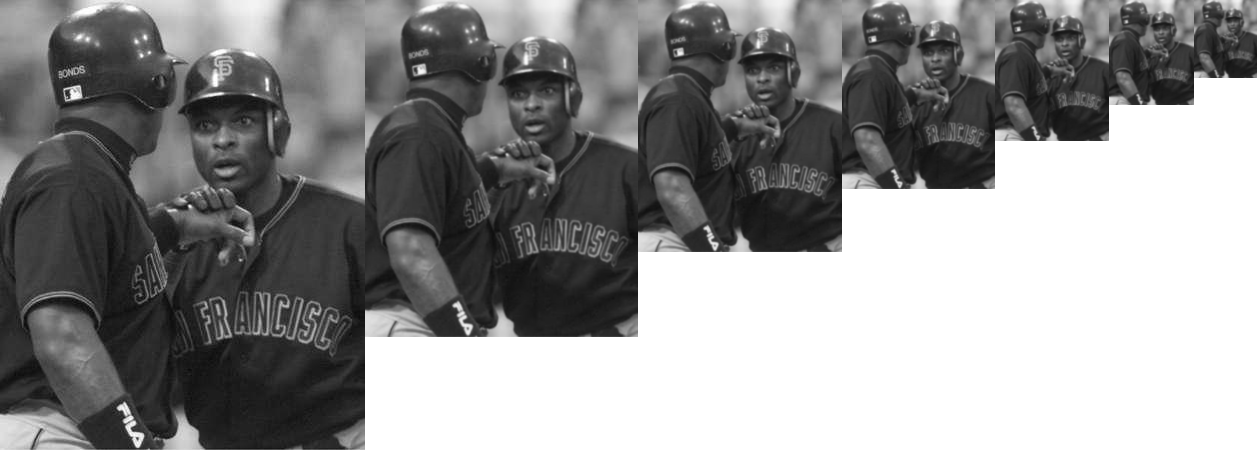

In [81]:
sports = Image.open('sports.jpg')
pyramid_image = MakeGaussianPyramid(sports, 0.75, 50)
ShowGaussianPyramid(pyramid_image)

## *Question 4*

In [109]:
def FindTemplate(pyramid, template, threshold):
  scaling_factor = 15/template.width
  new_height = int(scaling_factor * template.height)
  new_width = int(scaling_factor * template.width)
  resized_template = template.resize((new_width, new_height), Image.BICUBIC)

  points = []

  for i,image in enumerate(pyramid):
    ncc_array = ncc.normxcorr2D(image, resized_template)
    for x in range(image.width):
      for y in range(image.height):
        if ncc_array[y][x] > threshold:
          points.append((x/(0.75**i), y/(0.75**i)))

  image = pyramid[0]
  image = image.convert("RGB")
  for p in points:
    draw = ImageDraw.Draw(image)
    x1 = p[0]-20
    x2 = p[0]+20
    y1 = p[1]-25
    y2 = p[1]+25
    draw.line((x1,y1,x1,y2),fill="red",width=2)
    draw.line((x2,y1,x2,y2),fill="red",width=2)
    draw.line((x1,y1,x2,y1),fill="red",width=2)
    draw.line((x1,y2,x2,y2),fill="red",width=2)
    del draw
  return image

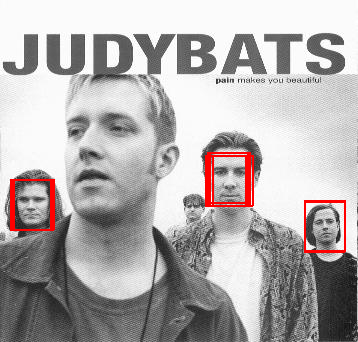

In [114]:
judybats = Image.open('judybats.jpg')
template = Image.open('template.jpg')
pyramid = MakeGaussianPyramid(judybats, 0.75, 50)
output = FindTemplate(pyramid, template, 0.7)
display(output)

## *Question 5*

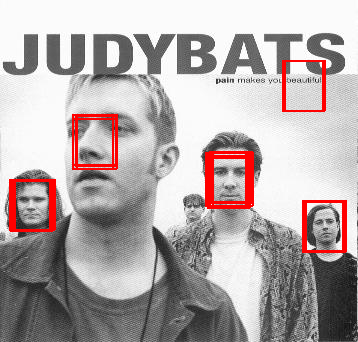

error rate 1/1


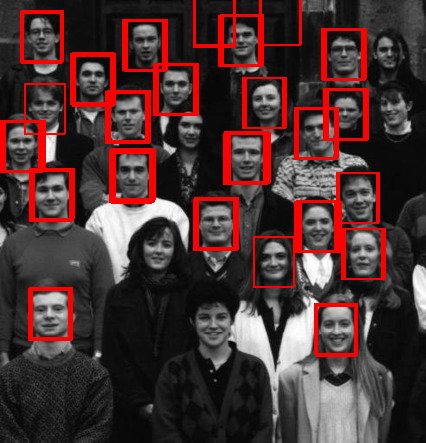

error rate 2/5


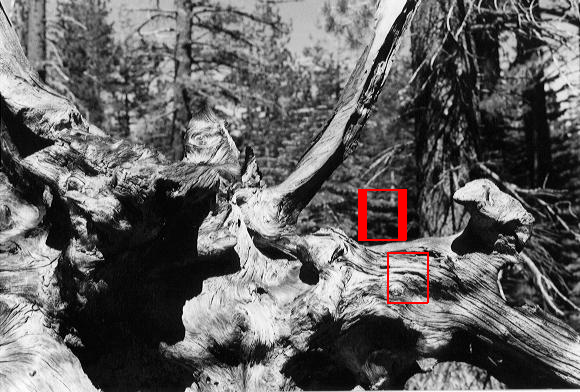

error rate 2/0


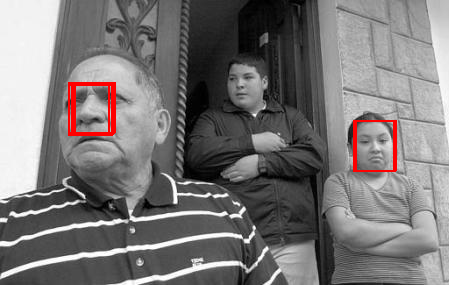

error rate 2/1


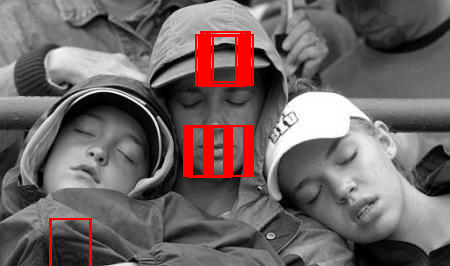

error rate 4/3


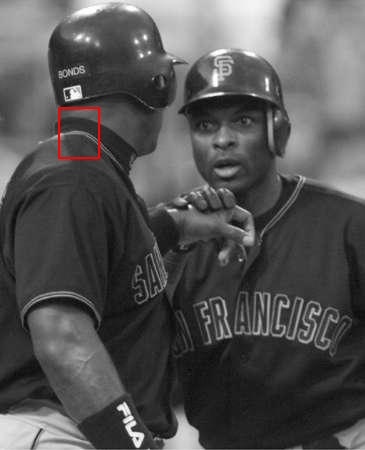

error rate 1/1


In [130]:
threshold = 0.6

judybats = Image.open('judybats.jpg')
judybats_pyramid = MakeGaussianPyramid(judybats, 0.75, 50)
judybats_output = FindTemplate(judybats_pyramid, template, threshold)

students = Image.open('students.jpg')
students_pyramid = MakeGaussianPyramid(students, 0.75, 50)
students_output = FindTemplate(students_pyramid, template, threshold)

tree = Image.open('tree.jpg')
tree_pyramid = MakeGaussianPyramid(tree, 0.75, 50)
tree_output = FindTemplate(tree_pyramid, template, threshold)

family = Image.open('family.jpg')
family_pyramid = MakeGaussianPyramid(family, 0.75, 50)
family_output = FindTemplate(family_pyramid, template, threshold)

fans = Image.open('fans.jpg')
fans_pyramid = MakeGaussianPyramid(fans, 0.75, 50)
fans_output = FindTemplate(fans_pyramid, template, threshold)

sports = Image.open('sports.jpg')
sports_pyramid = MakeGaussianPyramid(sports, 0.75, 50)
sports_output = FindTemplate(sports_pyramid, template, threshold)

display(judybats_output)
print("error rate 1/1")
display(students_output)
print("error rate 2/5")
display(tree_output)
print("error rate 2/0")
display(family_output)
print("error rate 2/1")
display(fans_output)
print("error rate 4/3")
display(sports_output)
print("error rate 1/1")

## *Question 6*

Recall Rates:



* judybats = 4/5
* students = 23/27
* tree = 0/0
* family = 2/3
* fans = 0/3
* sports = 0/1

The recall rate is low for some images because the provided template features a fully visible, front-facing face with a neutral expression. In contrast, some images lack a fully visible face and display different emotions or accessories, leading to poor template matching.





